This is evaluate all the models (random forest, naives baiyes and svm) on the test set

In [13]:
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, 
    precision_score, recall_score, f1_score, roc_auc_score, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


In [14]:
data = pd.read_csv('cleaned_data.csv')
print(f"Data loaded: {data.shape}")
print(f"Columns: {list(data.columns)}")

Data loaded: (17880, 17)
Columns: ['title', 'location', 'department', 'company_profile', 'description', 'requirements', 'benefits', 'has_company_logo', 'has_questions', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'fraudulent', 'combined_text', 'cleaned_text']


In [40]:
data.head(20)

,title,location,department,company_profile,description,requirements,benefits,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,combined_text,cleaned_text
0,Marketing Intern,United States,Marketing,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Unknown,Yes,No,Other,Internship,Other,Other,Marketing,0,Marketing Intern Marketing United States We're...,marketing intern marketing united state create...
1,Customer Service - Cloud Video Production,New Zealand,Success,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,Yes,No,Full-time,Not Applicable,Other,Marketing,Customer Service,0,Customer Service - Cloud Video Production Succ...,customer service cloud video production succes...
2,Commissioning Machinery Assistant (CMA),United States,Unknown,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Unknown,Yes,No,Unknown,Unknown,Other,Other,Unknown,0,Commissioning Machinery Assistant (CMA) Unknow...,commissioning machinery assistant cma unknown ...
3,Account Executive - Washington DC,United States,Sales,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,Yes,No,Full-time,Mid-Senior level,Bachelor,Technology,Sales,0,Account Executive - Washington DC Sales United...,account executive washington dc sale united st...
4,Bill Review Manager,United States,Unknown,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,Yes,Yes,Full-time,Mid-Senior level,Bachelor,Healthcare,Health Care Provider,0,Bill Review Manager Unknown United States Spot...,bill review manager unknown united state spots...
5,Accounting Clerk,United States,Unknown,Unknown,Job OverviewApex is an environmental consultin...,Unknown,Unknown,No,No,Unknown,Unknown,Other,Other,Unknown,0,Accounting Clerk Unknown United States Unknown...,accounting clerk unknown united state unknown ...
6,Head of Content (m/f),Germany,ANDROIDPIT,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,Yes,Yes,Full-time,Mid-Senior level,Master,Media,Management,0,Head of Content (m/f) ANDROIDPIT Germany Found...,head content androidpit germany founded thefon...
7,Lead Guest Service Specialist,United States,Unknown,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,Yes,Yes,Unknown,Unknown,Other,Other,Unknown,0,Lead Guest Service Specialist Unknown Unite...,lead guest service specialist unknown united s...
8,HP BSM SME,United States,Unknown,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,Unknown,Yes,Yes,Full-time,Associate,Other,Technology,Unknown,0,HP BSM SME Unknown United States Solutions3 is...,hp bsm sme unknown united state small business...
9,Customer Service Associate - Part Time,United States,Unknown,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,Unknown,Yes,No,Part-time,Entry level,High School,Finance,Customer Service,0,Customer Service Associate - Part Time Unknow...,customer service associate part time unknown u...


In [15]:
print(f"\nTarget distribution:")
print(data['fraudulent'].value_counts())
print(f"Fraud percentage: {data['fraudulent'].mean():.2%}")


Target distribution:
fraudulent
0    17014
1      866
Name: count, dtype: int64
Fraud percentage: 4.84%


In [16]:
model_dir = "models_notebook"
vectorizer = joblib.load(os.path.join(model_dir, "vectorizer.joblib"))
print("TF-IDF vectorizer loaded successfully!")

TF-IDF vectorizer loaded successfully!


In [17]:
X = data.drop(columns=['fraudulent'])
y = data['fraudulent']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [19]:
X_test_vectorized = vectorizer.transform(X_test['cleaned_text'])

print(f"Test set prepared: {X_test_vectorized.shape}")
print(f"Test target distribution: {y_test.value_counts()}")

Test set prepared: (5364, 5000)
Test target distribution: fraudulent
0    5104
1     260
Name: count, dtype: int64


In [20]:
model_configs = {
    'original': 'Original (No Sampling)',
    'undersample': 'Random Under Sampling', 
    'hybrid': 'SMOTE-ENN Hybrid',
    'adasyn': 'ADASYN Over Sampling'
}

In [21]:
classifier_names = ['random_forest', 'naive_bayes', 'support_vector_machine']
display_names = ['Random Forest', 'Naive Bayes', 'Support Vector Machine']

In [22]:
models = {}
for sampling_type in model_configs.keys():
    models[sampling_type] = {}
    for clf_name, display_name in zip(classifier_names, display_names):
        model_path = os.path.join(model_dir, f"{clf_name}_{sampling_type}.joblib")
        if os.path.exists(model_path):
            models[sampling_type][display_name] = joblib.load(model_path)
            print(f"Loaded: {display_name} - {model_configs[sampling_type]}")
        else:
            print(f"Warning: Model not found at {model_path}")

print(f"\nTotal models loaded: {sum(len(models[k]) for k in models.keys())}")

Loaded: Random Forest - Original (No Sampling)
Loaded: Naive Bayes - Original (No Sampling)
Loaded: Support Vector Machine - Original (No Sampling)
Loaded: Random Forest - Random Under Sampling
Loaded: Naive Bayes - Random Under Sampling
Loaded: Support Vector Machine - Random Under Sampling
Loaded: Random Forest - SMOTE-ENN Hybrid
Loaded: Naive Bayes - SMOTE-ENN Hybrid
Loaded: Support Vector Machine - SMOTE-ENN Hybrid
Loaded: Random Forest - ADASYN Over Sampling
Loaded: Naive Bayes - ADASYN Over Sampling
Loaded: Support Vector Machine - ADASYN Over Sampling

Total models loaded: 12


In [23]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """Evaluate a single model and return metrics"""
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }
    
    return metrics, y_pred, y_pred_proba

In [24]:
def evaluate_model(model, X_test, y_test, model_name="Model"):
    """Evaluate a single model and return metrics"""
    
    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    
    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    }
    
    return metrics, y_pred, y_pred_proba

In [25]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    """Plot confusion matrix for a model"""
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Non-Fraud', 'Fraud'],
                yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

In [27]:
def plot_roc_curves(models_dict, X_test, y_test, title="ROC Curves"):
    """Plot ROC curves for multiple models"""
    plt.figure(figsize=(10, 8))
    
    for model_name, model in models_dict.items():
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            auc_score = roc_auc_score(y_test, y_pred_proba)
            plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

EVALUATING ALL MODELS

📊 ORIGINAL (NO SAMPLING)
----------------------------------------
Random Forest        | Acc: 0.972 | Prec: 0.696 | Rec: 0.750 | F1: 0.722 | AUC: 0.984
Naive Bayes          | Acc: 0.960 | Prec: 0.650 | Rec: 0.392 | F1: 0.489 | AUC: 0.949
Support Vector Machine | Acc: 0.983 | Prec: 1.000 | Rec: 0.658 | F1: 0.794 | AUC: 0.992


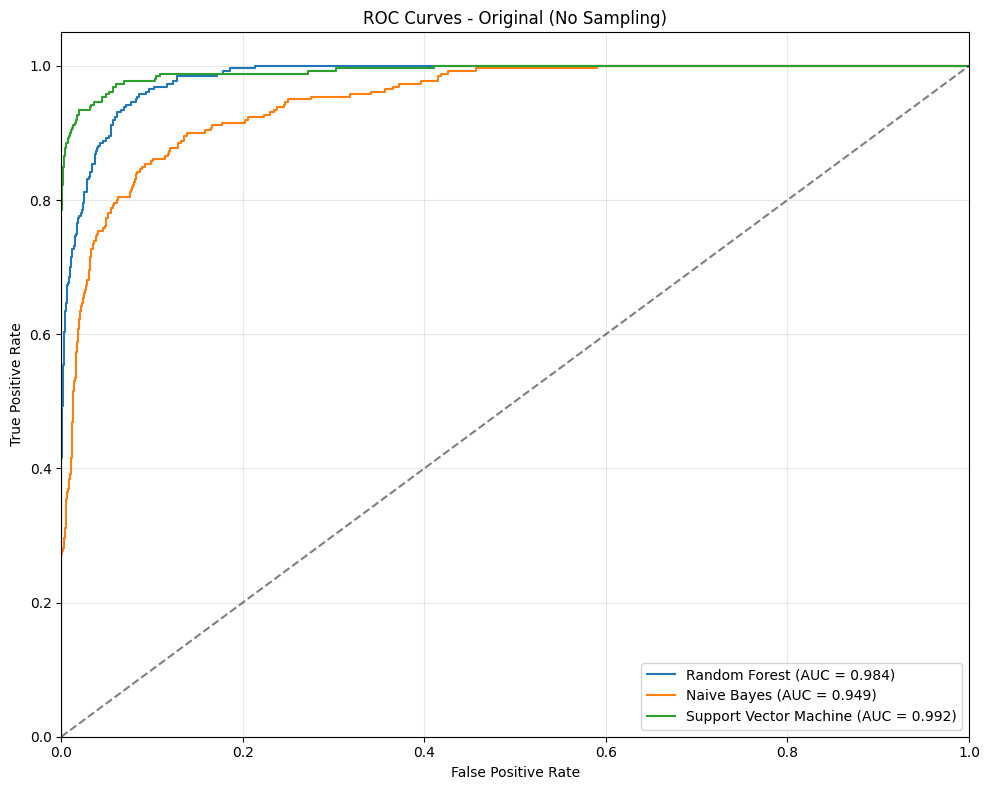


📊 RANDOM UNDER SAMPLING
----------------------------------------
Random Forest        | Acc: 0.922 | Prec: 0.378 | Rec: 0.938 | F1: 0.539 | AUC: 0.982
Naive Bayes          | Acc: 0.789 | Prec: 0.181 | Rec: 0.954 | F1: 0.305 | AUC: 0.972
Support Vector Machine | Acc: 0.956 | Prec: 0.527 | Rec: 0.938 | F1: 0.675 | AUC: 0.991


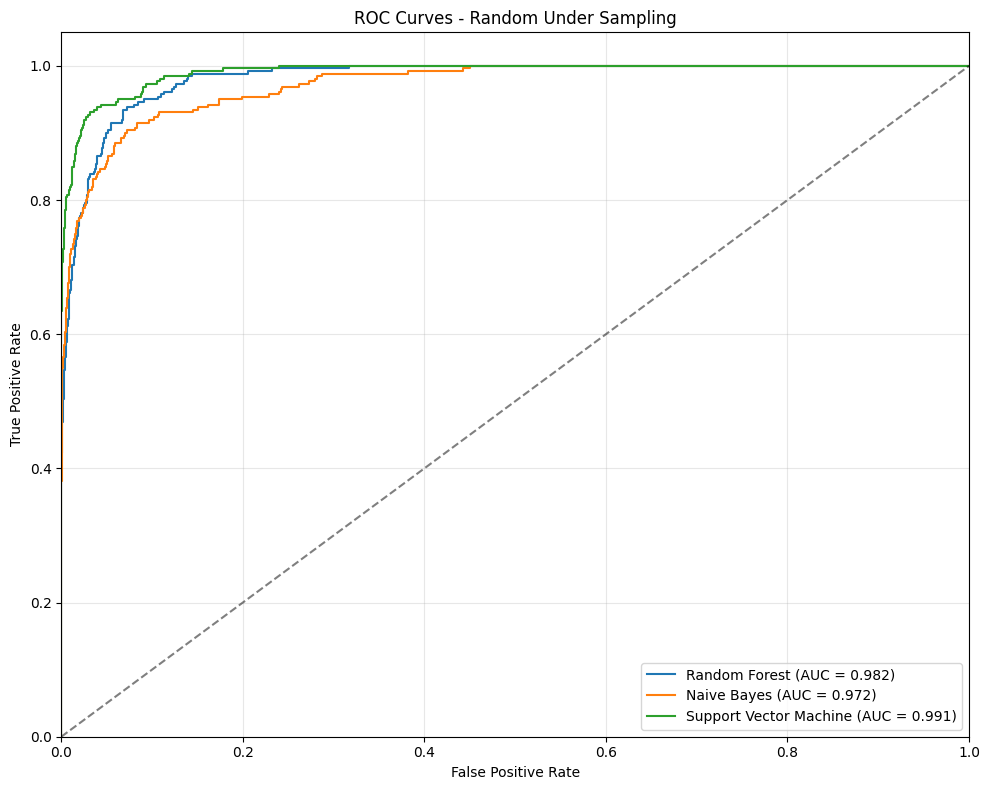


📊 SMOTE-ENN HYBRID
----------------------------------------
Random Forest        | Acc: 0.949 | Prec: 0.487 | Rec: 0.885 | F1: 0.628 | AUC: 0.984
Naive Bayes          | Acc: 0.861 | Prec: 0.255 | Rec: 0.969 | F1: 0.404 | AUC: 0.982
Support Vector Machine | Acc: 0.979 | Prec: 0.747 | Rec: 0.862 | F1: 0.800 | AUC: 0.994


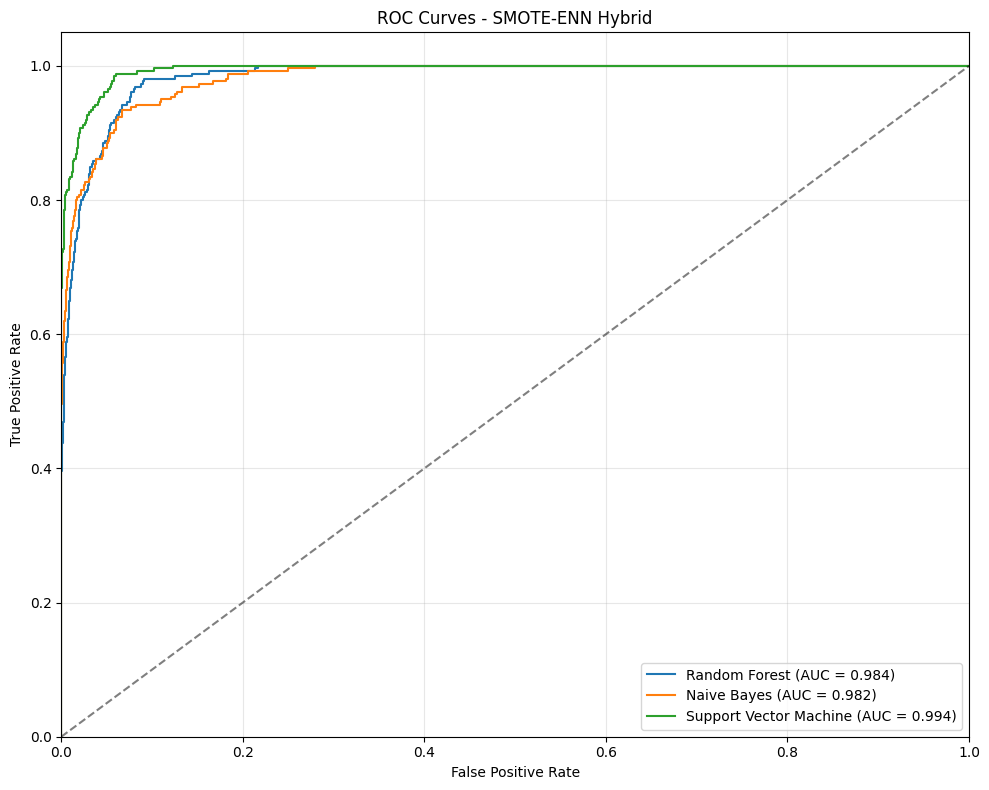


📊 ADASYN OVER SAMPLING
----------------------------------------
Random Forest        | Acc: 0.975 | Prec: 0.740 | Rec: 0.754 | F1: 0.747 | AUC: 0.985
Naive Bayes          | Acc: 0.877 | Prec: 0.276 | Rec: 0.942 | F1: 0.426 | AUC: 0.971
Support Vector Machine | Acc: 0.987 | Prec: 1.000 | Rec: 0.735 | F1: 0.847 | AUC: 0.994


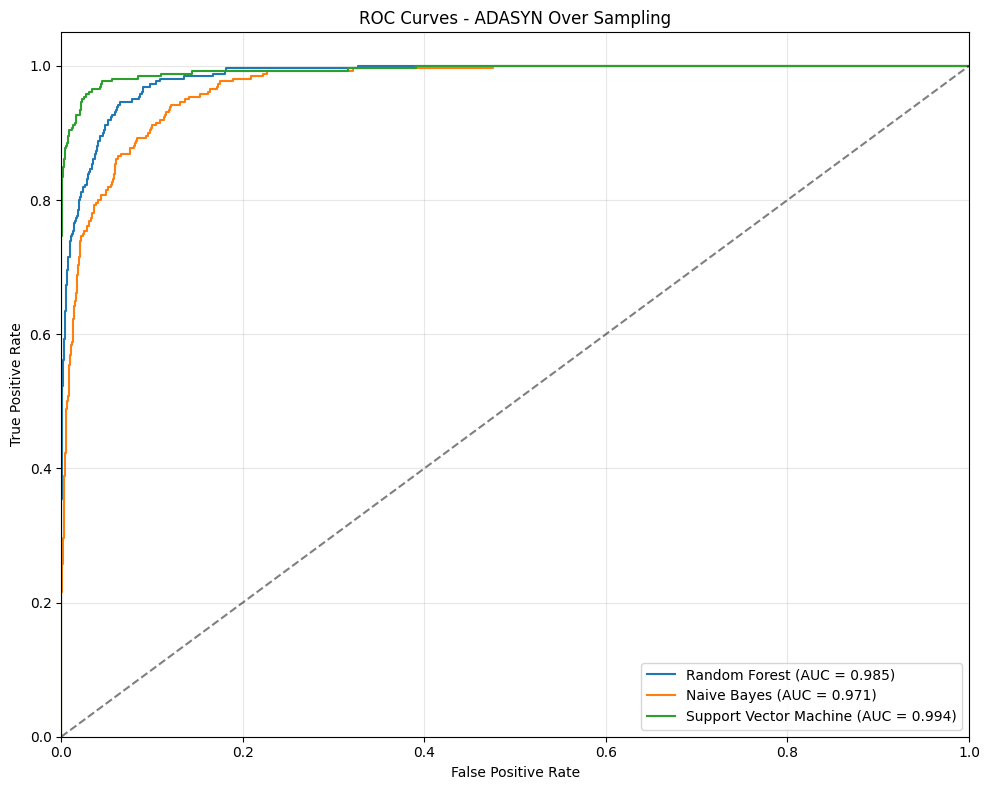

In [28]:
all_results = []

print("=" * 60)
print("EVALUATING ALL MODELS")
print("=" * 60)

for sampling_type, sampling_name in model_configs.items():
    print(f"\n📊 {sampling_name.upper()}")
    print("-" * 40)
    
    if sampling_type in models and models[sampling_type]:
        # Evaluate each classifier for this sampling type
        sampling_results = []
        
        for clf_name, model in models[sampling_type].items():
            metrics, y_pred, y_pred_proba = evaluate_model(
                model, X_test_vectorized, y_test, 
                f"{clf_name} ({sampling_name})"
            )
            
            all_results.append(metrics)
            sampling_results.append((clf_name, model, y_pred, y_pred_proba))
            
            print(f"{clf_name:20} | Acc: {metrics['Accuracy']:.3f} | "
                  f"Prec: {metrics['Precision']:.3f} | "
                  f"Rec: {metrics['Recall']:.3f} | "
                  f"F1: {metrics['F1-Score']:.3f} | "
                  f"AUC: {metrics['ROC-AUC']:.3f}")
        
        # Plot ROC curves for this sampling type
        models_dict = {name: model for name, model, _, _ in sampling_results}
        plot_roc_curves(models_dict, X_test_vectorized, y_test, 
                       f"ROC Curves - {sampling_name}")
        
    else:
        print("No models found for this sampling type!")

In [29]:
results_df = pd.DataFrame(all_results)
print("📈 COMPLETE RESULTS SUMMARY")
print("=" * 80)
print(results_df.to_string(index=False, float_format='%.3f'))

# %%
# Find best model for each metric
metrics_to_check = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']

print("\n🏆 BEST MODELS BY METRIC")
print("=" * 50)

for metric in metrics_to_check:
    best_idx = results_df[metric].idxmax()
    best_model = results_df.loc[best_idx, 'Model']
    best_score = results_df.loc[best_idx, metric]
    print(f"{metric:12} | {best_model:35} | {best_score:.3f}")

📈 COMPLETE RESULTS SUMMARY
                                          Model  Accuracy  Precision  Recall  F1-Score  ROC-AUC
         Random Forest (Original (No Sampling))     0.972      0.696   0.750     0.722    0.984
           Naive Bayes (Original (No Sampling))     0.960      0.650   0.392     0.489    0.949
Support Vector Machine (Original (No Sampling))     0.983      1.000   0.658     0.794    0.992
          Random Forest (Random Under Sampling)     0.922      0.378   0.938     0.539    0.982
            Naive Bayes (Random Under Sampling)     0.789      0.181   0.954     0.305    0.972
 Support Vector Machine (Random Under Sampling)     0.956      0.527   0.938     0.675    0.991
               Random Forest (SMOTE-ENN Hybrid)     0.949      0.487   0.885     0.628    0.984
                 Naive Bayes (SMOTE-ENN Hybrid)     0.861      0.255   0.969     0.404    0.982
      Support Vector Machine (SMOTE-ENN Hybrid)     0.979      0.747   0.862     0.800    0.994
           Ra

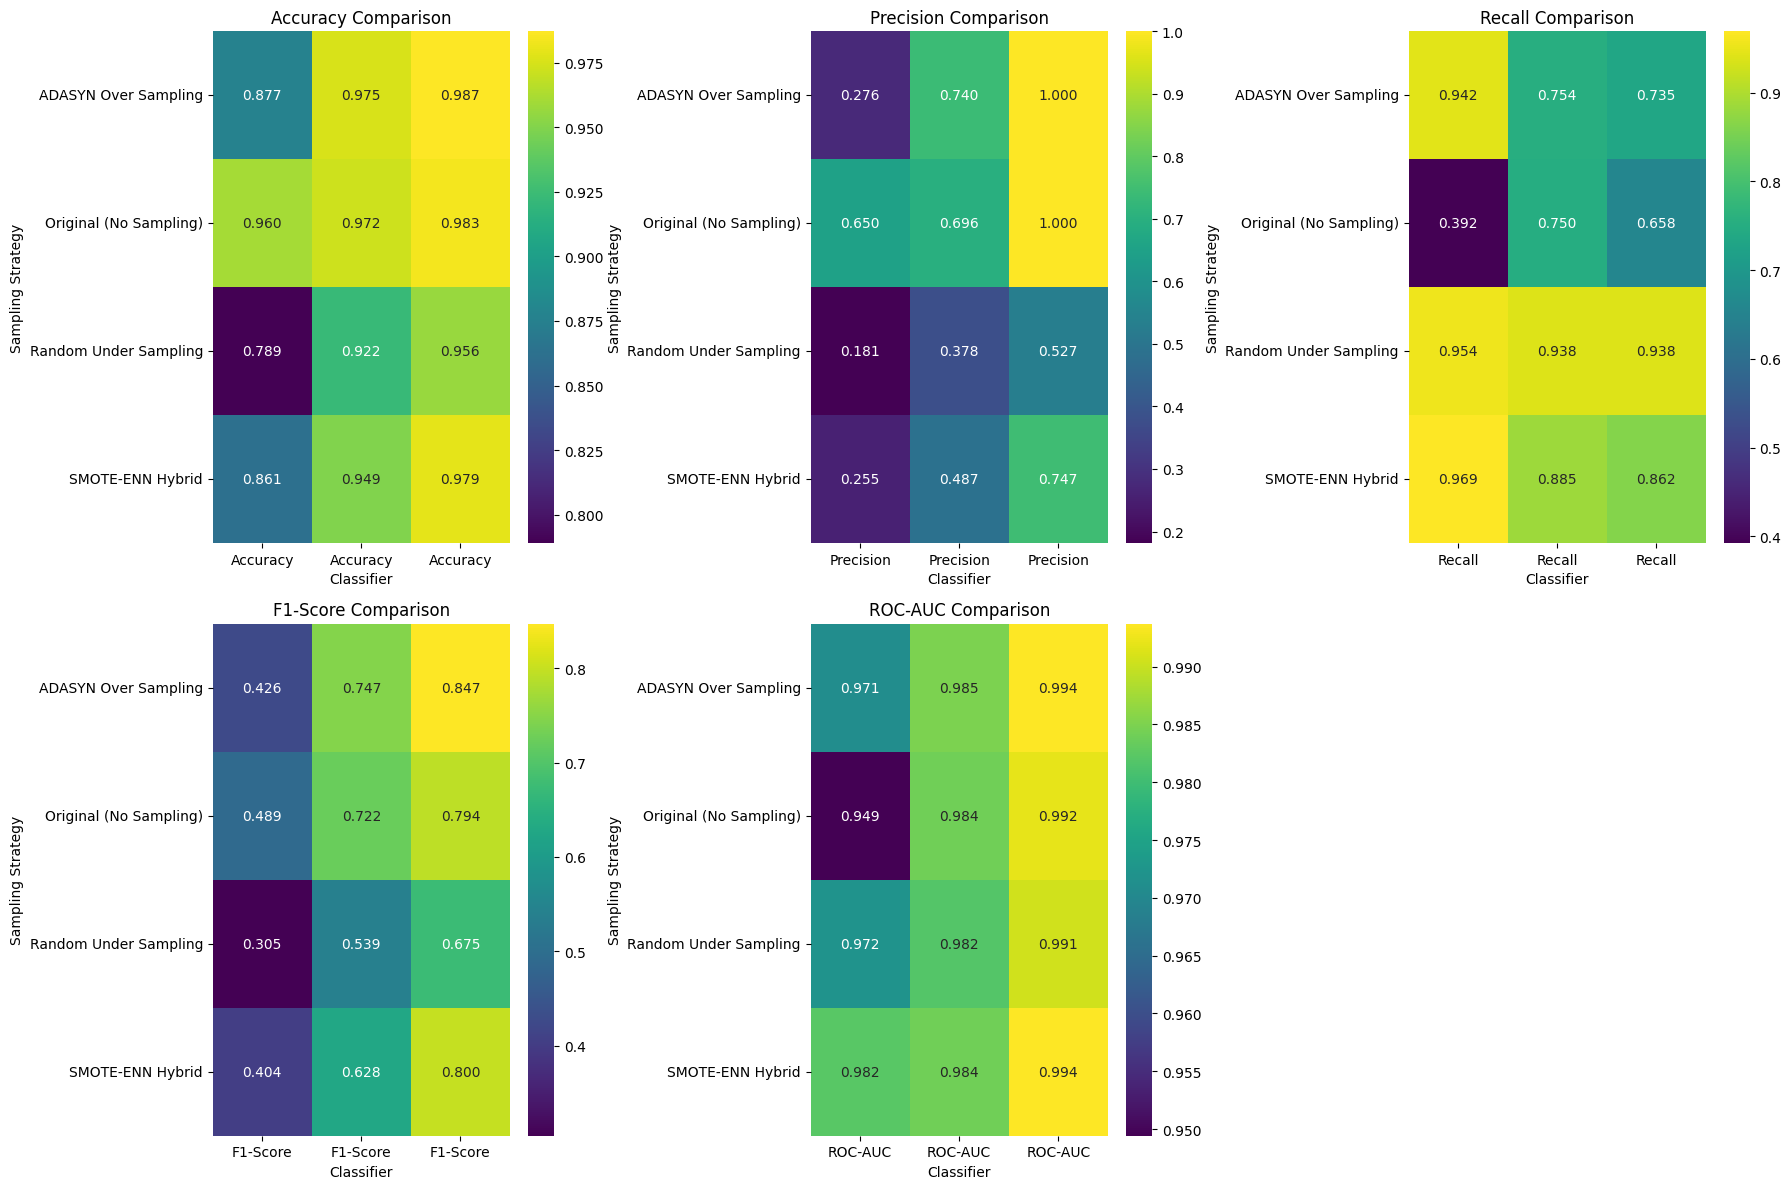

In [30]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics_to_check):
    ax = axes[i]
    
    # Create a pivot table for better visualization
    pivot_data = results_df.pivot_table(
        index=results_df['Model'].str.extract(r'\((.*)\)')[0], 
        columns=results_df['Model'].str.extract(r'^([^(]+)')[0].str.strip(), 
        values=metric
    )
    
    sns.heatmap(pivot_data, annot=True, fmt='.3f', cmap='viridis', ax=ax)
    ax.set_title(f'{metric} Comparison')
    ax.set_xlabel('Classifier')
    ax.set_ylabel('Sampling Strategy')

# Remove the extra subplot
axes[-1].remove()

plt.tight_layout()
plt.show()

In [31]:
best_f1_idx = results_df['F1-Score'].idxmax()
best_model_name = results_df.loc[best_f1_idx, 'Model']
best_f1_score = results_df.loc[best_f1_idx, 'F1-Score']

print(f"🥇 BEST OVERALL MODEL (by F1-Score): {best_model_name}")
print(f"F1-Score: {best_f1_score:.3f}")

# Extract sampling type and classifier name
sampling_type = best_model_name.split('(')[1].split(')')[0].lower().replace(' ', '_').replace('-', '_')
clf_name = best_model_name.split('(')[0].strip()

# Load the best model
best_model = None
for samp_key in model_configs.keys():
    if sampling_type in samp_key or samp_key in sampling_type:
        if clf_name in models[samp_key]:
            best_model = models[samp_key][clf_name]
            break

if best_model is None:
    print("Could not load the best model automatically. Please check manually.")
else:
    print("Best model loaded successfully!")

🥇 BEST OVERALL MODEL (by F1-Score): Support Vector Machine (ADASYN Over Sampling)
F1-Score: 0.847
Best model loaded successfully!



📊 DETAILED ANALYSIS: Support Vector Machine (ADASYN Over Sampling)
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5104
           1       1.00      0.73      0.85       260

    accuracy                           0.99      5364
   macro avg       0.99      0.87      0.92      5364
weighted avg       0.99      0.99      0.99      5364



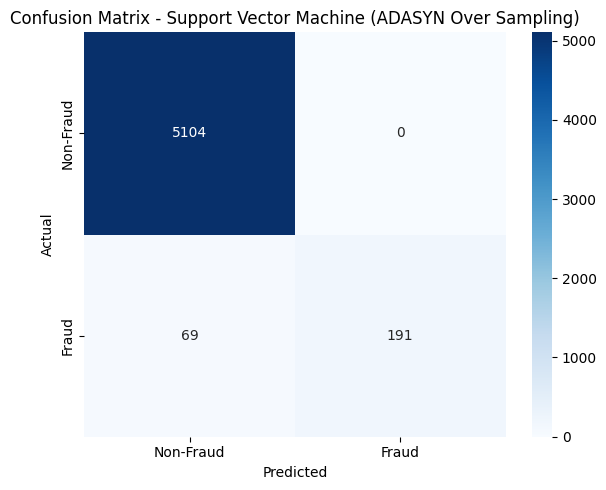

In [32]:
if best_model is not None:
    print(f"\n📊 DETAILED ANALYSIS: {best_model_name}")
    print("=" * 60)
    
    # Get predictions
    y_pred_best = best_model.predict(X_test_vectorized)
    y_pred_proba_best = best_model.predict_proba(X_test_vectorized)[:, 1]
    
    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred_best))
    
    # Confusion Matrix
    plot_confusion_matrix(y_test, y_pred_best, best_model_name)
    
    # Feature importance (if available)
    if hasattr(best_model, 'feature_importances_'):
        feature_names = vectorizer.get_feature_names_out()
        importances = best_model.feature_importances_
        
        # Get top 20 most important features
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values('importance', ascending=False).head(20)
        
        plt.figure(figsize=(10, 8))
        sns.barplot(data=feature_importance_df, x='importance', y='feature', palette='viridis')
        plt.title(f'Top 20 Feature Importances - {best_model_name}')
        plt.xlabel('Importance Score')
        plt.tight_layout()
        plt.show()
        
        print(f"\nTop 10 Most Important Features:")
        for i, row in feature_importance_df.head(10).iterrows():
            print(f"{row['feature']:20} | {row['importance']:.4f}")


In [33]:
print("\n📋 AVERAGE PERFORMANCE BY SAMPLING STRATEGY")
print("=" * 60)

sampling_performance = []
for sampling_type, sampling_name in model_configs.items():
    # Filter results for this sampling type
    mask = results_df['Model'].str.contains(f"({sampling_name})", regex=False)
    subset = results_df[mask]
    
    if not subset.empty:
        avg_metrics = {
            'Sampling Strategy': sampling_name,
            'Avg Accuracy': subset['Accuracy'].mean(),
            'Avg Precision': subset['Precision'].mean(),
            'Avg Recall': subset['Recall'].mean(),
            'Avg F1-Score': subset['F1-Score'].mean(),
            'Avg ROC-AUC': subset['ROC-AUC'].mean()
        }
        sampling_performance.append(avg_metrics)

sampling_df = pd.DataFrame(sampling_performance)
print(sampling_df.to_string(index=False, float_format='%.3f'))


📋 AVERAGE PERFORMANCE BY SAMPLING STRATEGY
     Sampling Strategy  Avg Accuracy  Avg Precision  Avg Recall  Avg F1-Score  Avg ROC-AUC
Original (No Sampling)         0.972          0.782       0.600         0.668        0.975
 Random Under Sampling         0.889          0.362       0.944         0.506        0.981
      SMOTE-ENN Hybrid         0.930          0.496       0.905         0.611        0.987
  ADASYN Over Sampling         0.946          0.672       0.810         0.673        0.983


In [34]:
print("\n🤖 AVERAGE PERFORMANCE BY CLASSIFIER TYPE")
print("=" * 60)

classifier_performance = []
for clf_name in display_names:
    # Filter results for this classifier
    mask = results_df['Model'].str.startswith(clf_name)
    subset = results_df[mask]
    
    if not subset.empty:
        avg_metrics = {
            'Classifier': clf_name,
            'Avg Accuracy': subset['Accuracy'].mean(),
            'Avg Precision': subset['Precision'].mean(),
            'Avg Recall': subset['Recall'].mean(),
            'Avg F1-Score': subset['F1-Score'].mean(),
            'Avg ROC-AUC': subset['ROC-AUC'].mean()
        }
        classifier_performance.append(avg_metrics)

classifier_df = pd.DataFrame(classifier_performance)
print(classifier_df.to_string(index=False, float_format='%.3f'))



🤖 AVERAGE PERFORMANCE BY CLASSIFIER TYPE
            Classifier  Avg Accuracy  Avg Precision  Avg Recall  Avg F1-Score  Avg ROC-AUC
         Random Forest         0.955          0.575       0.832         0.659        0.984
           Naive Bayes         0.872          0.340       0.814         0.406        0.969
Support Vector Machine         0.976          0.818       0.798         0.779        0.992


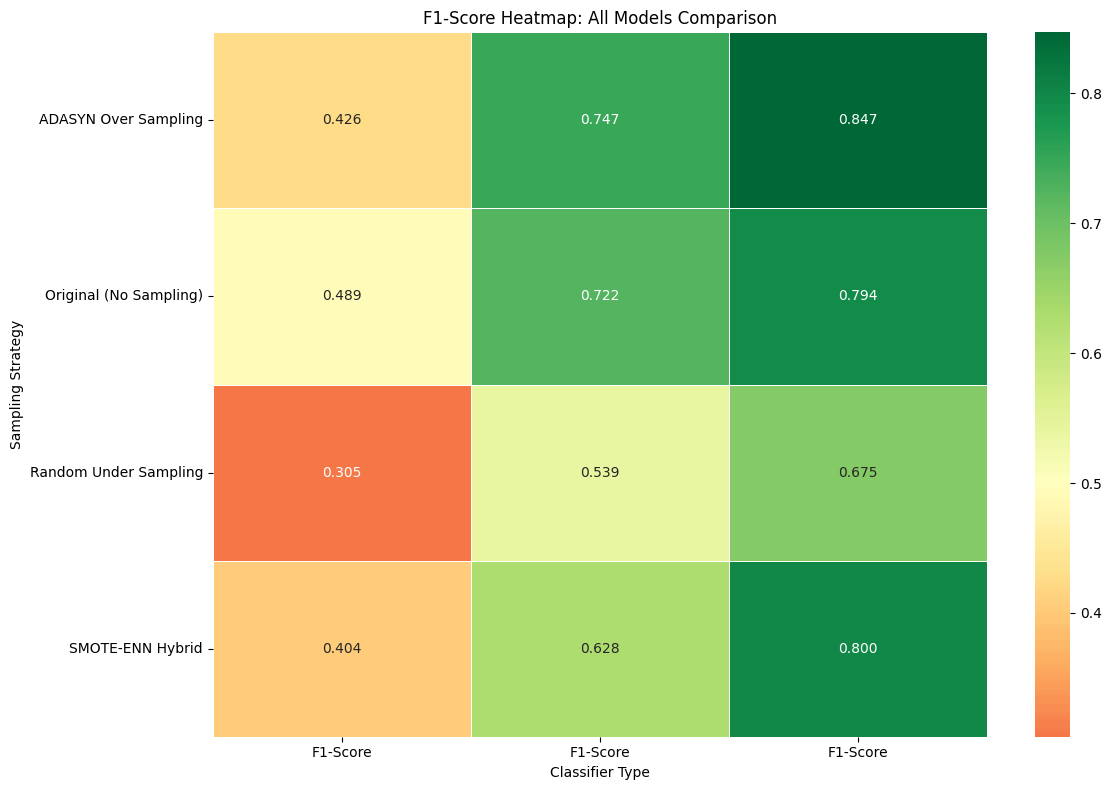

In [35]:
pivot_f1 = results_df.pivot_table(
    index=results_df['Model'].str.extract(r'\((.*)\)')[0], 
    columns=results_df['Model'].str.extract(r'^([^(]+)')[0].str.strip(), 
    values='F1-Score'
)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_f1, annot=True, fmt='.3f', cmap='RdYlGn', 
            center=0.5, linewidths=0.5)
plt.title('F1-Score Heatmap: All Models Comparison')
plt.xlabel('Classifier Type')
plt.ylabel('Sampling Strategy')
plt.tight_layout()
plt.show()


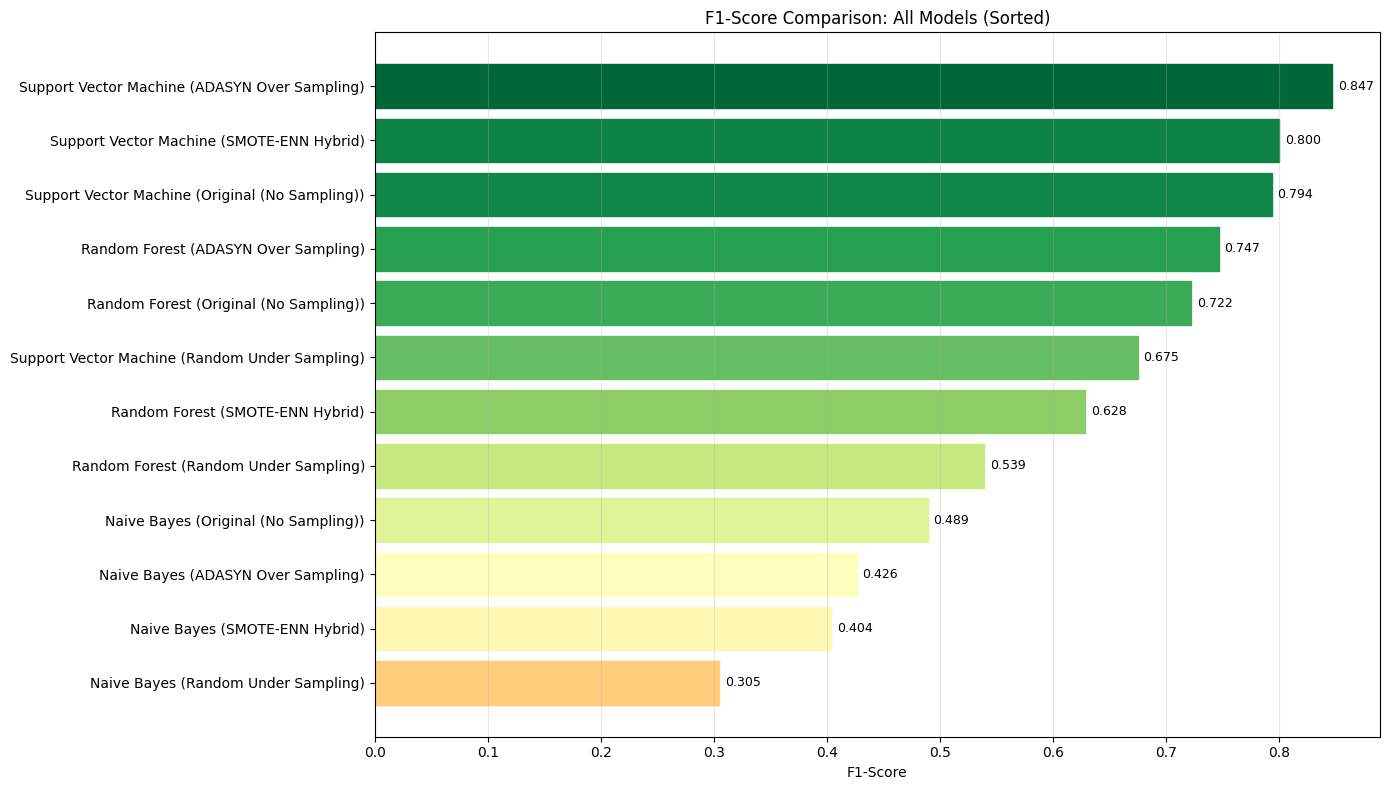

In [36]:
plt.figure(figsize=(14, 8))
sorted_results = results_df.sort_values('F1-Score', ascending=True)

bars = plt.barh(range(len(sorted_results)), sorted_results['F1-Score'])

# Color bars based on performance
colors = plt.cm.RdYlGn(sorted_results['F1-Score'] / sorted_results['F1-Score'].max())
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.yticks(range(len(sorted_results)), sorted_results['Model'], fontsize=10)
plt.xlabel('F1-Score')
plt.title('F1-Score Comparison: All Models (Sorted)')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(sorted_results['F1-Score']):
    plt.text(v + 0.005, i, f'{v:.3f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [37]:
print("🎯 PERFORMANCE SUMMARY & RECOMMENDATIONS")
print("=" * 70)

# Find top 3 models
top_3 = results_df.nlargest(3, 'F1-Score')
print("\n🥇 TOP 3 MODELS (by F1-Score):")
for i, (_, row) in enumerate(top_3.iterrows(), 1):
    print(f"{i}. {row['Model']}")
    print(f"   F1: {row['F1-Score']:.3f} | Precision: {row['Precision']:.3f} | Recall: {row['Recall']:.3f} | AUC: {row['ROC-AUC']:.3f}")

# Sampling strategy analysis
print(f"\n📈 BEST SAMPLING STRATEGY: {sampling_df.loc[sampling_df['Avg F1-Score'].idxmax(), 'Sampling Strategy']}")
print(f"   Average F1-Score: {sampling_df['Avg F1-Score'].max():.3f}")

# Classifier analysis  
print(f"\n🤖 BEST CLASSIFIER: {classifier_df.loc[classifier_df['Avg F1-Score'].idxmax(), 'Classifier']}")
print(f"   Average F1-Score: {classifier_df['Avg F1-Score'].max():.3f}")

# Identify models with high precision (good for minimizing false positives)
high_precision = results_df[results_df['Precision'] > 0.8].sort_values('Precision', ascending=False)
if not high_precision.empty:
    print(f"\n🎯 HIGH PRECISION MODELS (>0.8) - Good for minimizing false alarms:")
    for _, row in high_precision.iterrows():
        print(f"   {row['Model']} | Precision: {row['Precision']:.3f}")

# Identify models with high recall (good for catching fraud)
high_recall = results_df[results_df['Recall'] > 0.8].sort_values('Recall', ascending=False)
if not high_recall.empty:
    print(f"\n🕵️ HIGH RECALL MODELS (>0.8) - Good for catching fraud:")
    for _, row in high_recall.iterrows():
        print(f"   {row['Model']} | Recall: {row['Recall']:.3f}")


🎯 PERFORMANCE SUMMARY & RECOMMENDATIONS

🥇 TOP 3 MODELS (by F1-Score):
1. Support Vector Machine (ADASYN Over Sampling)
   F1: 0.847 | Precision: 1.000 | Recall: 0.735 | AUC: 0.994
2. Support Vector Machine (SMOTE-ENN Hybrid)
   F1: 0.800 | Precision: 0.747 | Recall: 0.862 | AUC: 0.994
3. Support Vector Machine (Original (No Sampling))
   F1: 0.794 | Precision: 1.000 | Recall: 0.658 | AUC: 0.992

📈 BEST SAMPLING STRATEGY: ADASYN Over Sampling
   Average F1-Score: 0.673

🤖 BEST CLASSIFIER: Support Vector Machine
   Average F1-Score: 0.779

🎯 HIGH PRECISION MODELS (>0.8) - Good for minimizing false alarms:
   Support Vector Machine (Original (No Sampling)) | Precision: 1.000
   Support Vector Machine (ADASYN Over Sampling) | Precision: 1.000

🕵️ HIGH RECALL MODELS (>0.8) - Good for catching fraud:
   Naive Bayes (SMOTE-ENN Hybrid) | Recall: 0.969
   Naive Bayes (Random Under Sampling) | Recall: 0.954
   Naive Bayes (ADASYN Over Sampling) | Recall: 0.942
   Support Vector Machine (Random 

In [38]:
if best_model is not None:
    print(f"\n🔍 ERROR ANALYSIS: {best_model_name}")
    print("=" * 60)
    
    y_pred_best = best_model.predict(X_test_vectorized)
    
    # False Positives (predicted fraud, but actually legitimate)
    fp_mask = (y_pred_best == 1) & (y_test == 0)
    false_positives = X_test[fp_mask]['cleaned_text']
    
    # False Negatives (predicted legitimate, but actually fraud)
    fn_mask = (y_pred_best == 0) & (y_test == 1)
    false_negatives = X_test[fn_mask]['cleaned_text']
    
    print(f"False Positives: {fp_mask.sum()} cases")
    print(f"False Negatives: {fn_mask.sum()} cases")
    
    if fp_mask.sum() > 0:
        print(f"\nExample False Positive (predicted fraud, actually legitimate):")
        print(f"Text: {false_positives.iloc[0][:200]}...")
    
    if fn_mask.sum() > 0:
        print(f"\nExample False Negative (predicted legitimate, actually fraud):")
        print(f"Text: {false_negatives.iloc[0][:200]}...")


🔍 ERROR ANALYSIS: Support Vector Machine (ADASYN Over Sampling)
False Positives: 0 cases
False Negatives: 69 cases

Example False Negative (predicted legitimate, actually fraud):
Text: ambulatory surgery endoscopy rn operation manager unknown united state unknown apply using link bristol hospital bristol ct exciting opportunity operation manager perioperative center servicing ambula...


In [39]:
# Final summary
print(f"\n🎉 EVALUATION COMPLETE!")
print(f"Best Model: {best_model_name} (F1-Score: {best_f1_score:.3f})")
print(f"Total Models Evaluated: {len(results_df)}")


🎉 EVALUATION COMPLETE!
Best Model: Support Vector Machine (ADASYN Over Sampling) (F1-Score: 0.847)
Total Models Evaluated: 12
